## TimeSeries Forcasting Week 3 - R implementation

### Simulate Time series and look at its properties

In [3]:
##
et <- read.csv("../data/module3_data_Identifying_ARMA.csv", header = TRUE,
stringsAsFactors = FALSE)
head(et)

et
-1.2138662
-0.2854597
0.5902700
0.8285463
-0.9954260
-0.3716332


In [4]:
## mean and sd
mean(et$et)
sd(et$et)

[1] -0.02845985

[1] 0.9819995

In [15]:
newet <- rbind(et,et,et,et,et) # populate values
## generate variable for AR
yar <- rep(0, 2500)
for ( i in 2:2500 ) {
    yar[i] <- 3.00 + newet$et[i] + 0.55 * yar[i-1]
}

In [16]:
##generate variable for MA
yma <- rep(0,2500)
for (i in 2:2500) {
yma[i] <- -2.5 + newet$et[i] + 0.70 * newet$et[i-1]
}

In [18]:
## generating an arma(1,1) variable
yArma <- rep(0,2500)
for (i in 2:2500) {
    yArma[i] <- 0.5 +0.55 * yArma[i-1] + newet$et[i] + 0.70 * newet$et[i-1]
}

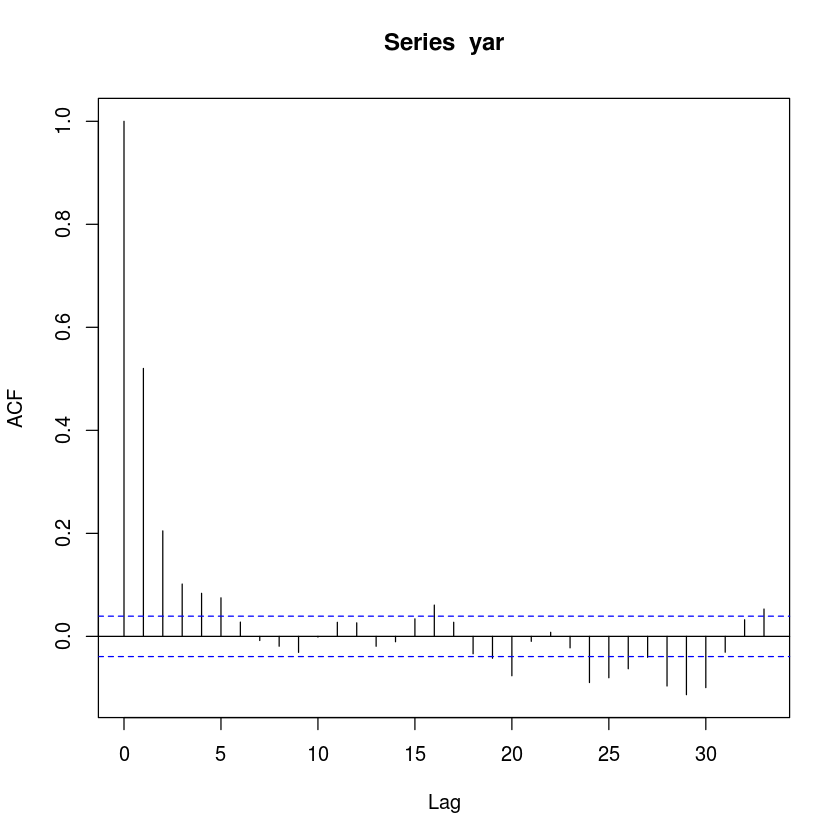

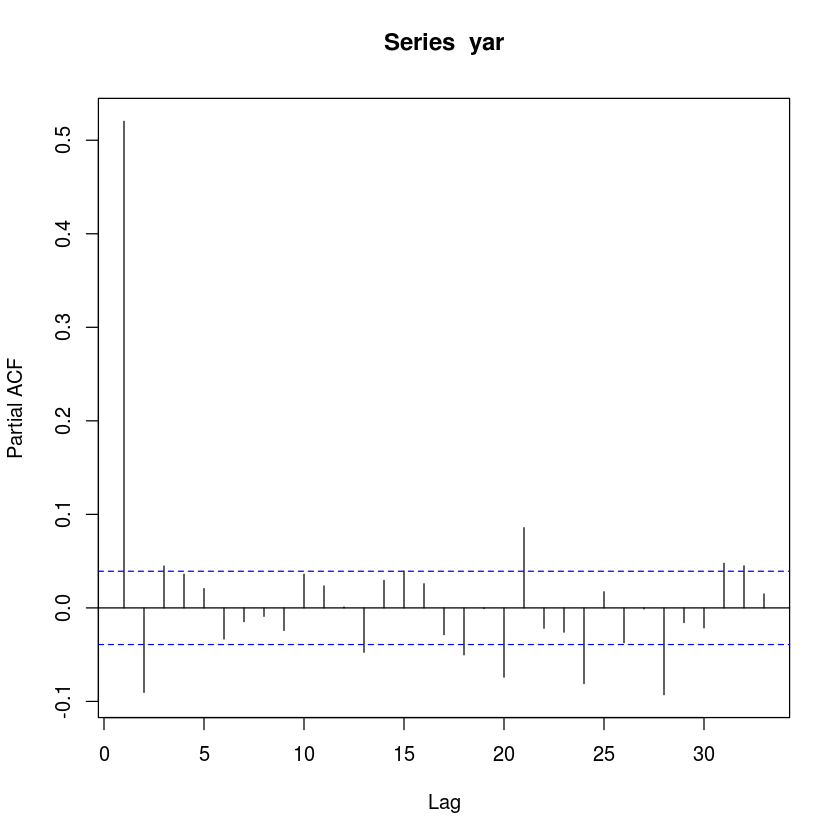

In [19]:
## plots for autocorrelation function (ACF) and partial autocorrelation function (PACF)
yaracf <- acf(yar)
yarpacf  <- pacf(yar)

In [23]:
## we can get the raw number to look at as well 
yaracf


Autocorrelations of series ‘yar’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.520  0.205  0.102  0.084  0.075  0.028 -0.008 -0.019 -0.031 -0.001 
    11     12     13     14     15     16     17     18     19     20     21 
 0.027  0.026 -0.019 -0.010  0.034  0.061  0.027 -0.034 -0.042 -0.076 -0.010 
    22     23     24     25     26     27     28     29     30     31     32 
 0.008 -0.022 -0.090 -0.080 -0.063 -0.041 -0.096 -0.113 -0.099 -0.031  0.032 
    33 
 0.053 

### Assuming stationary, AR model lag selections

In [24]:
library(dplyr)

ERROR: Error in library(dplyr): there is no package called ‘dplyr’


In [25]:
install.packages("dplyr")

Installing package into ‘/home/ubuntu/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
also installing the dependencies ‘assertthat’, ‘Rcpp’, ‘tibble’, ‘lazyeval’, ‘DBI’, ‘BH’

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”